## Project IMHOTEP
Demo how to plot runoffs timeseries from the freshwater runoff forcing of IMHOTEP experiment (NEMO).

### Import modules

In [1]:
## standart libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


In [41]:
prefix = "eORCA025.L75-IMHOTEP"

# NAME of ENSEMBLE EXPERIMENT:
# "EAI": all runoffs varying
# "ES": all runoffs climatological
nexp = "ES"

varnasss = 'sosaline'

# ensemble size
NE=10

# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/"+fo+"/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"


* Find directory and file list

In [42]:
# Runoffs directory
diridat = li.Ffindinputdata(nexp,prefix=prefix)

#  Runoffs file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(rnffiles)
varnarnf = 'sornf'

/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.001-S/1y/????/eORCA025.L75-IMHOTEP.ES*flxT.nc


* Load data

In [43]:
# RNF
RNF1 = li.imhov(rnffiles, varnarnf,nexp,fo,y1,y2,diff=False,dirigrid=diri)
RNF1.process()
RNF1.convertRNF()

* Plot a subregion corresponding to East India / Bay of Bengal

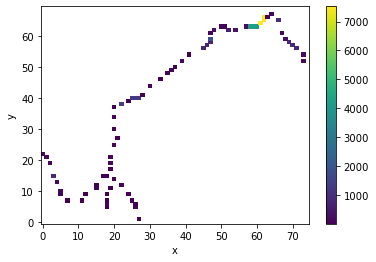

In [44]:
rnfselmap = RNF1.data.isel(x=slice(10,85),y=slice(710,780)).squeeze().mean(dim='time_counter').plot()

* Select only Grange-Bramapoutre delta 

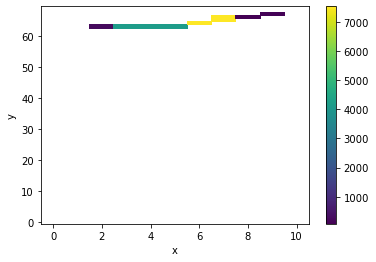

In [45]:
rnfselmap = RNF1.data.isel(x=slice(65,76),y=slice(710,780)).squeeze()  
gange = rnfselmap.where(rnfselmap>0).squeeze()
gange.mean(dim='time_counter').plot()

* Sum up runoffs in this subregion (Gange+Bramapoutre)

In [46]:
stacked_data = gange.stack(z=("x", "y"))
tsgange = stacked_data.sum(dim='z')

* Plot timeseries

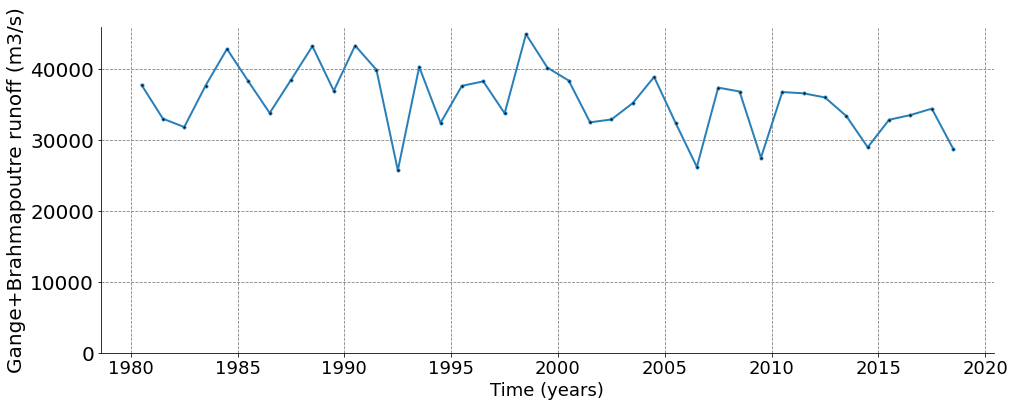

In [13]:
namo="ts_indo-RNF_"+nexp+".png"
gp = 0

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

tsgange.plot(linewidth=2,color='#2980b9',marker='.',markerfacecolor='k')
ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")
plt.xlabel("Time (years)")
plt.ylabel("Gange+Brahmapoutre runoff (m3/s)")
plt.ylim(0,46000)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)

### Note: 
_From wikipedia, the main runoffs of  Gange is 12000 m3/s and  Bramapoutre 21000 m3/s, so total should be around  33000 m3:s. 
The above plot is consistent with those numbers in the recent years._

* Select Mahanadi river

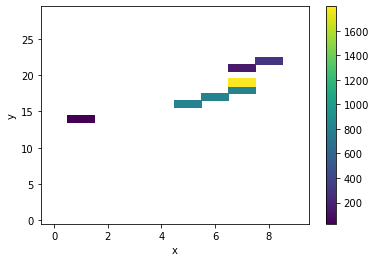

In [47]:
rnfselmap = RNF1.data.isel(x=slice(50,60),y=slice(750,780)).squeeze()  #.mean(dim='time_counter')
mahanadi = rnfselmap.where(rnfselmap>0).squeeze()
mahanadi.mean(dim='time_counter').plot()

In [48]:
stacked_data = mahanadi.stack(z=("x", "y"))
tsmahanadi = stacked_data.sum(dim='z')

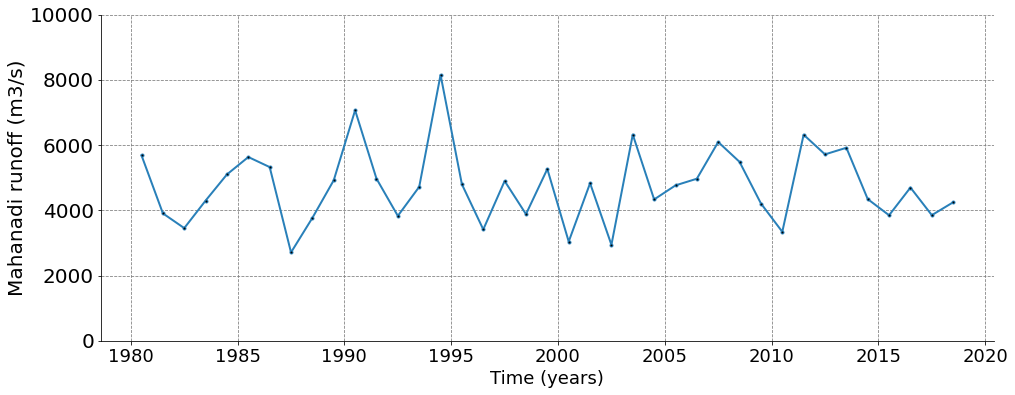

In [29]:
namo="ts_indoM-RNF_"+nexp+".png"
gp = 0

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

tsmahanadi.plot(linewidth=2,color='#2980b9',marker='.',markerfacecolor='k')
ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")
plt.xlabel("Time (years)")
plt.ylabel("Mahanadi runoff (m3/s)")
plt.ylim(0,10000)
#plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)

* Plot all rivers together

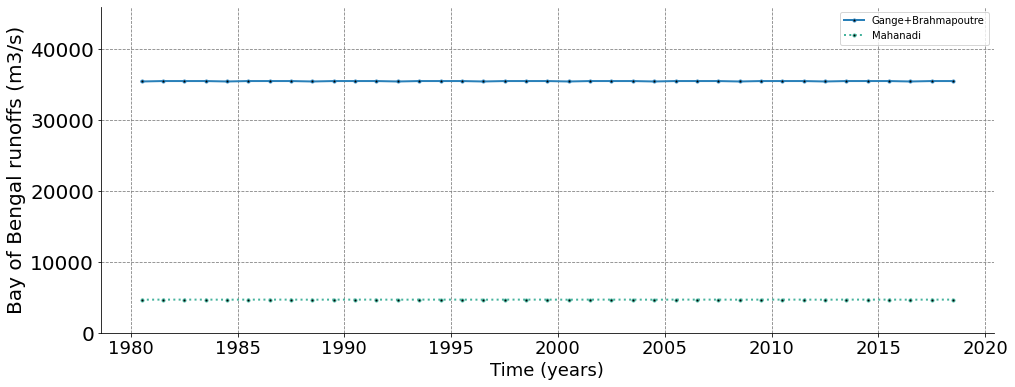

In [49]:
namo="ts_GBM-RNF_"+nexp+".png"
gp = 0

# plot timeseries
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

tsgange.plot(linewidth=2,color='#2980b9',marker='.',markerfacecolor='k',label='Gange+Brahmapoutre')
tsmahanadi.plot(linewidth=2,color='#45b39d',linestyle=':',marker='.',markerfacecolor='k',label='Mahanadi')

ax = plt.gca()    


ax.grid(which='both', color='grey', linestyle='--')
# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')


plt.xticks(rotation=0, ha='center',va="top")
plt.xlabel("Time (years)")
plt.ylabel("Bay of Bengal runoffs (m3/s)")
plt.ylim(0,46000)
plt.legend()

plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1,diro,namo,dpifig=300)